In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
import numpy as np
import seaborn as sns
warnings.filterwarnings('ignore')

In [5]:
dt = pd.read_csv('./data/age.csv',index_col=0)
dt.dropna(axis=1,inplace=True)
dt

,구분,2005,2005건강,2005재정,2005관계,2005가정,2005사회,2006,2006건강,2006재정,...,2020재정,2020관계,2020가정,2020사회,2021,2021건강,2021재정,2021관계,2021가정,2021사회
0,10대,6.94,7.57,5.09,7.44,7.36,7.21,7.02,7.66,5.26,...,6.47,7.58,7.45,7.32,6.66,7.28,5.93,6.76,6.71,6.60
1,20대,6.67,7.19,5.27,7.10,7.04,6.73,6.79,7.31,5.44,...,6.04,6.96,6.88,6.65,6.47,7.11,5.70,6.63,6.55,6.34
2,30대,6.46,6.79,5.29,6.73,7.00,6.47,6.57,6.90,5.45,...,5.88,6.47,6.60,6.22,6.20,6.57,5.63,6.29,6.45,6.08
3,40대,6.37,6.60,5.22,6.65,6.89,6.49,6.42,6.64,5.30,...,5.63,6.23,6.45,6.07,6.09,6.38,5.57,6.15,6.33,6.01
4,50대,6.17,6.24,5.05,6.51,6.74,6.30,6.16,6.18,5.07,...,5.98,6.59,6.65,6.46,6.29,6.52,5.78,6.39,6.49,6.26
5,60대 이상,5.49,5.23,4.45,5.98,6.14,5.61,5.42,5.12,4.43,...,6.20,6.70,6.59,6.47,6.23,6.46,5.76,6.37,6.38,6.19


In [6]:
age_year = pd.DataFrame()
years = ['2012','2013','2014','2015','2016','2017','2018','2019','2020','2021'] 


for y in years:
    df = dt.melt(id_vars='구분',value_vars=y,var_name='년도',value_name='소계')
    age_year = pd.concat([age_year,df],axis=0)

age_year.sort_values(['구분','년도'],inplace=True)
age_year.reset_index(drop=True, inplace=True)
age_year['소계'] = age_year['소계'].astype(float)

## Plotly

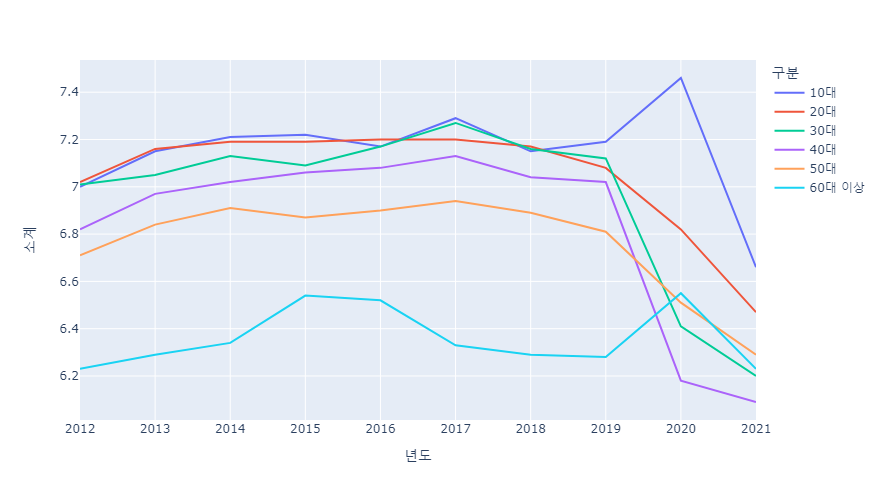

In [11]:
import plotly.express as px
import plotly.graph_objects as go
fig = px.line(age_year, x="년도", y="소계", color='구분',width=800, height=500)
fig.show()

# plot

In [7]:
lst = ['10대', '20대', '30대', '40대', '50대', '60대 이상']

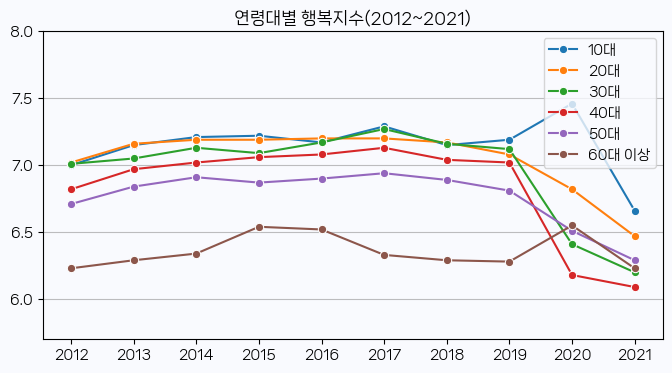

In [9]:
plt.figure(figsize=(8,4))
#그래프 내부 배경 색

mpl.rc('axes', facecolor = '#F9FAFE', edgecolor = 'k')

#그래프 외부 배경 색

mpl.rc('figure', facecolor = '#F9FAFE', edgecolor ='#F9FAFE')
for a in lst:
    data = age_year[age_year['구분']==a]
    sns.lineplot(x='년도', y='소계',data=data, marker='o')
plt.grid(True,axis='y',color='gray',alpha=0.5)
plt.ylim(5.7,8.)
plt.legend(lst)
plt.xlabel(None)
plt.ylabel(None)
plt.title('연령대별 행복지수(2012~2021)')
plt.savefig('./png/age.png')

In [10]:
year = ['2012','2013','2014','2015','2016','2017','2018','2019','2020','2021']
labels= ['건강','재정','관계','가정','사회']
index = np.arange(len(labels))
colors = ['#3AB0FF', '#FFB562', '#F87474', '#F4E06D','#C499BA']

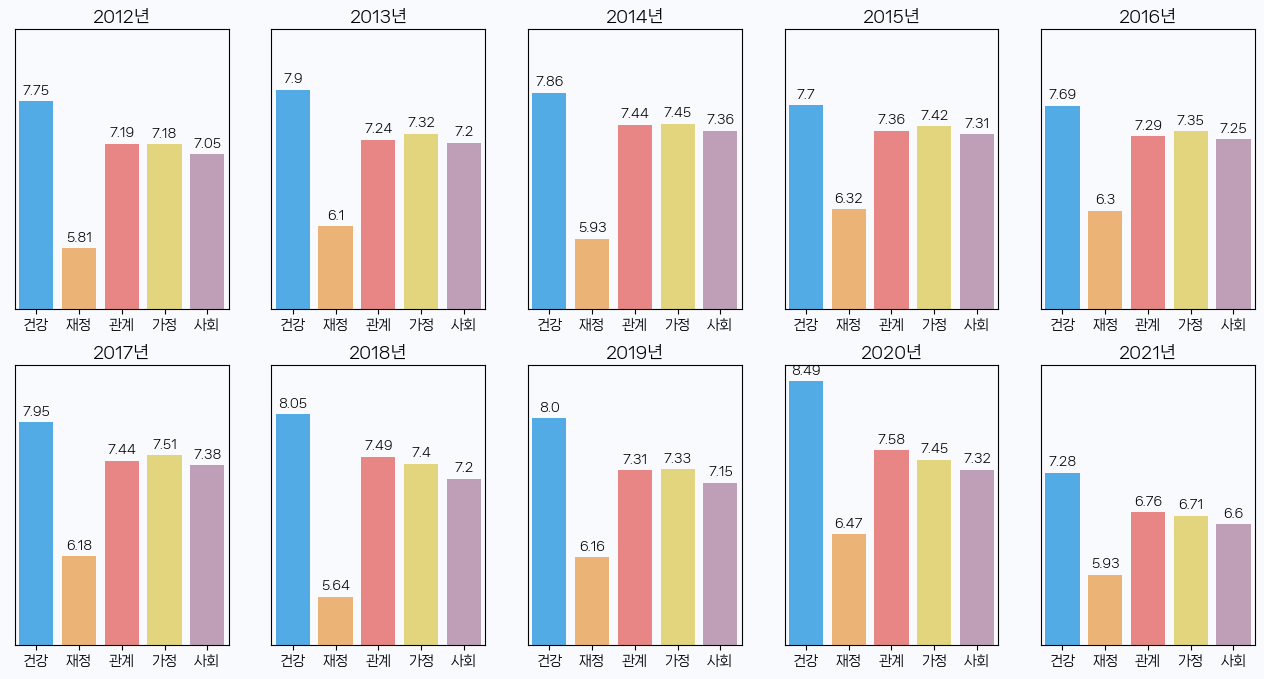

In [12]:
plt.figure(figsize=(16,8))
#그래프 내부 배경 색

mpl.rc('axes', facecolor = '#F9FAFE', edgecolor = 'k')

#그래프 외부 배경 색

mpl.rc('figure', facecolor = '#F9FAFE', edgecolor ='#F9FAFE')
for i,y in enumerate(year):
    pie = pd.DataFrame(dt.loc[0,f'{y}':f'{y}사회'])
    pie.rename(columns={0:'idx'},inplace=True)
    pie.drop(index=y,inplace=True)
    # print(pie.iloc[:,:])
    
    i += 1
    plt.subplot(2,5,i)
    g = sns.barplot(data=pie,x=labels,y='idx',palette=colors)
    ax = g
    ax.get_yaxis().set_visible(False)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height+0.1, height, ha = 'center', size = 9)

    plt.title(f'{y}년')
    plt.ylim(5,8.7)
    plt.ylabel('')
    plt.xticks(index, labels)

plt.savefig('./png/10.png')
plt.show()

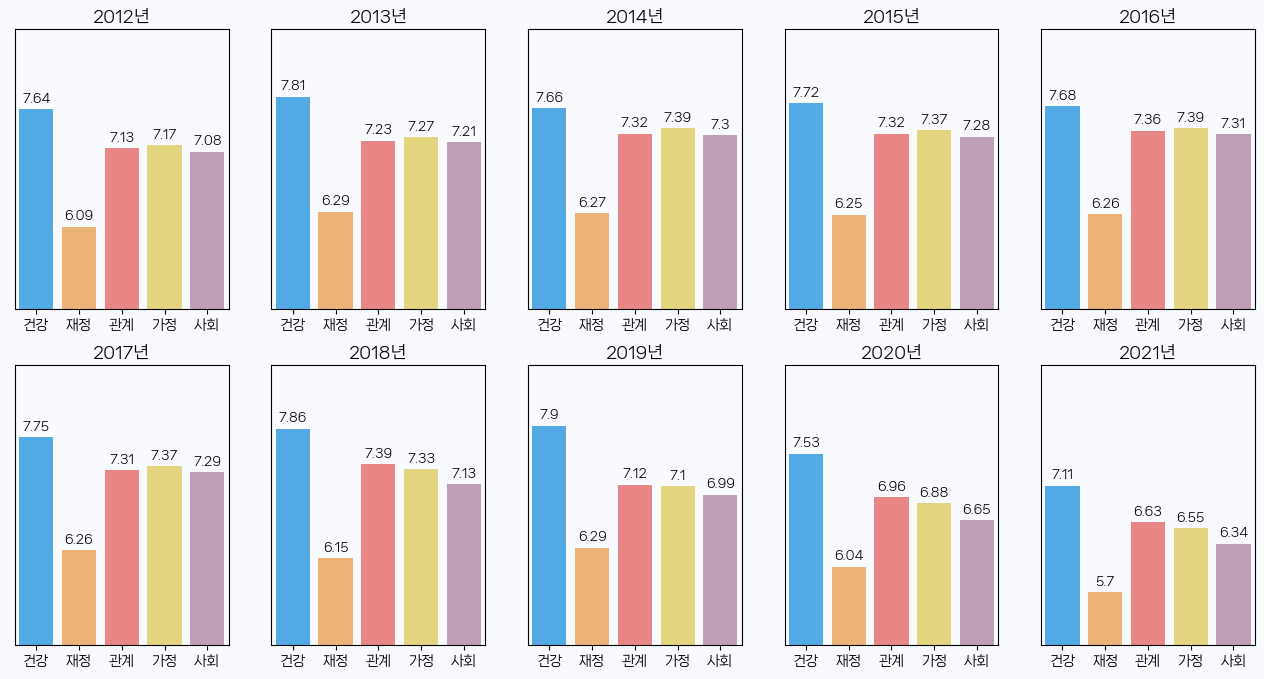

In [13]:
plt.figure(figsize=(16,8))
#그래프 내부 배경 색

mpl.rc('axes', facecolor = '#F9FAFE', edgecolor = 'k')

#그래프 외부 배경 색

mpl.rc('figure', facecolor = '#F9FAFE', edgecolor ='#F9FAFE')
for i,y in enumerate(year):
    pie = pd.DataFrame(dt.loc[1,f'{y}':f'{y}사회'])
    pie.rename(columns={1:'idx'},inplace=True)
    pie.drop(index=y,inplace=True)
    # print(pie.iloc[:,:])
    
    i += 1
    plt.subplot(2,5,i)
    g = sns.barplot(data=pie,x=labels,y='idx',palette=colors)
    ax = g
    ax.get_yaxis().set_visible(False)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height+0.1, height, ha = 'center', size = 9)

    plt.title(f'{y}년')
    plt.ylim(5,8.7)
    plt.ylabel('')
    plt.xticks(index, labels)

plt.savefig('./png/20.png')

plt.show()

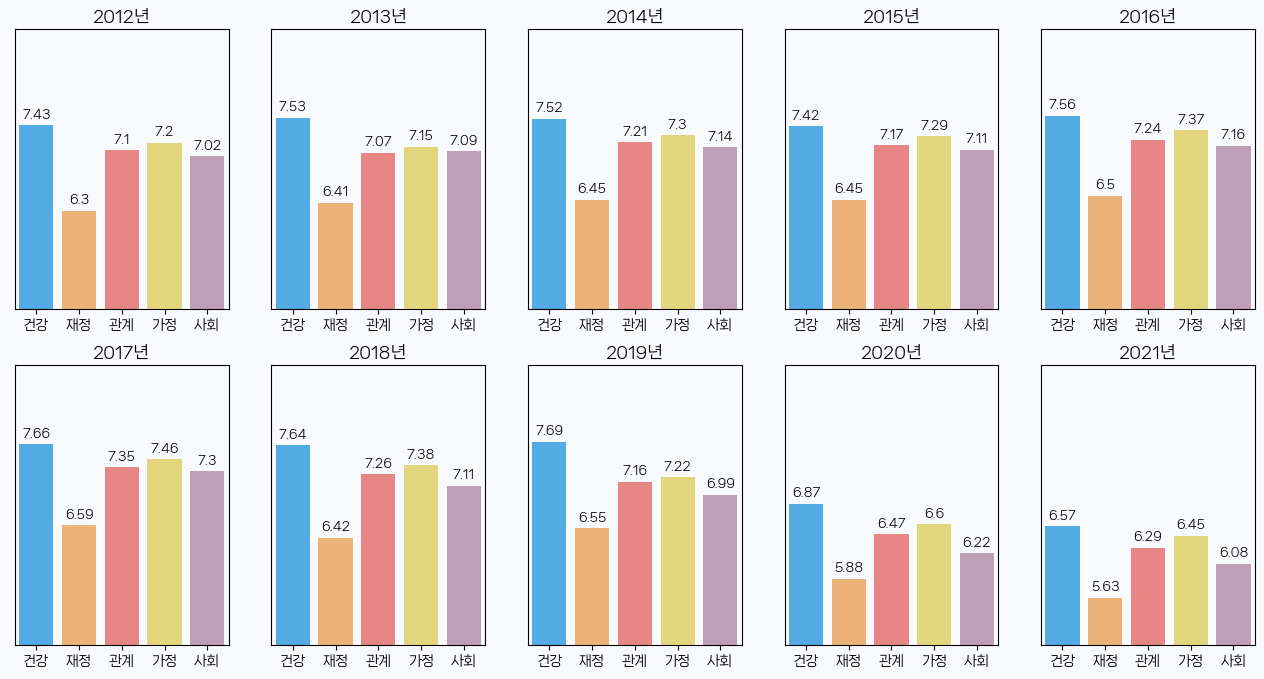

In [14]:
plt.figure(figsize=(16,8))
#그래프 내부 배경 색

mpl.rc('axes', facecolor = '#F9FAFE', edgecolor = 'k')

#그래프 외부 배경 색

mpl.rc('figure', facecolor = '#F9FAFE', edgecolor ='#F9FAFE')
for i,y in enumerate(year):
    pie = pd.DataFrame(dt.loc[2,f'{y}':f'{y}사회'])
    pie.rename(columns={2:'idx'},inplace=True)
    pie.drop(index=y,inplace=True)
    # print(pie.iloc[:,:])
    
    i += 1
    plt.subplot(2,5,i)
    g = sns.barplot(data=pie,x=labels,y='idx',palette=colors)
    ax = g
    ax.get_yaxis().set_visible(False)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height+0.1, height, ha = 'center', size = 9)

    plt.title(f'{y}년')
    plt.ylim(5,8.7)
    plt.ylabel('')
    plt.xticks(index, labels)

plt.savefig('./png/30.png')

plt.show()

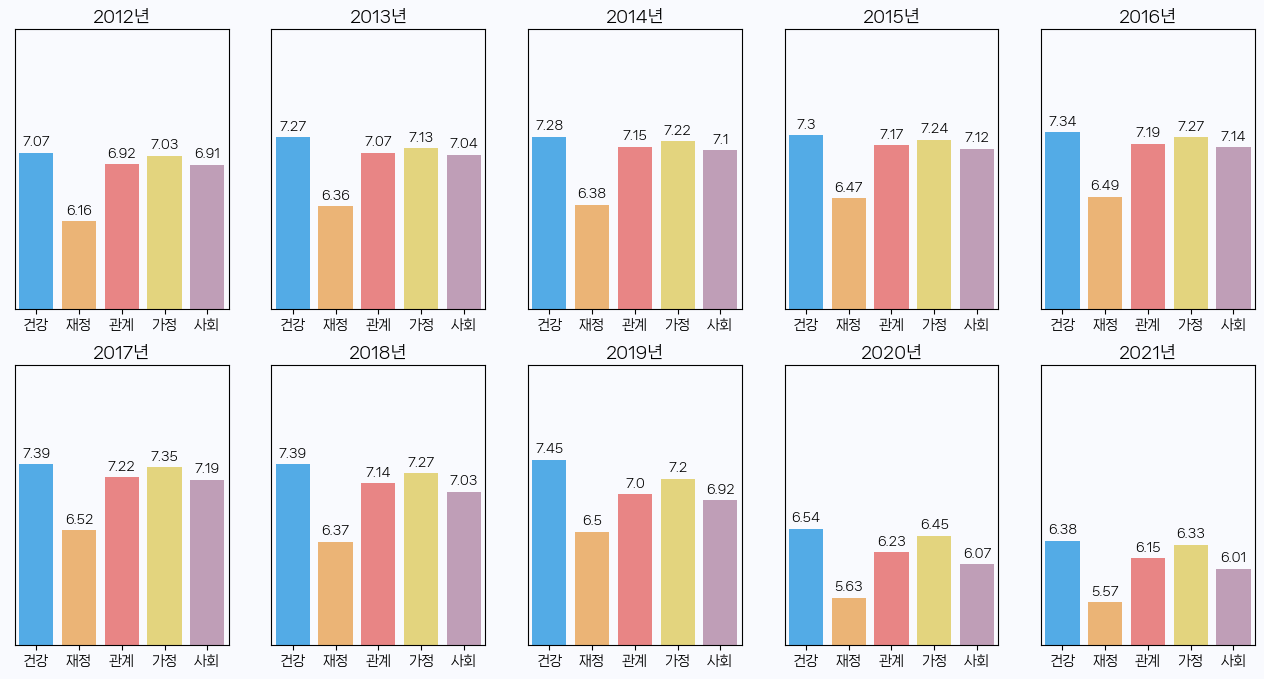

In [15]:
plt.figure(figsize=(16,8))
#그래프 내부 배경 색

mpl.rc('axes', facecolor = '#F9FAFE', edgecolor = 'k')

#그래프 외부 배경 색

mpl.rc('figure', facecolor = '#F9FAFE', edgecolor ='#F9FAFE')
for i,y in enumerate(year):
    pie = pd.DataFrame(dt.loc[3,f'{y}':f'{y}사회'])
    pie.rename(columns={3:'idx'},inplace=True)
    pie.drop(index=y,inplace=True)
    # print(pie.iloc[:,:])
    
    i += 1
    plt.subplot(2,5,i)
    g = sns.barplot(data=pie,x=labels,y='idx',palette=colors)
    ax = g
    ax.get_yaxis().set_visible(False)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height+0.1, height, ha = 'center', size = 9)

    plt.title(f'{y}년')
    plt.ylim(5,8.7)
    plt.ylabel('')
    plt.xticks(index, labels)

# plt.savefig('seoul_pie.png')
plt.savefig('./png/40.png')

plt.show()

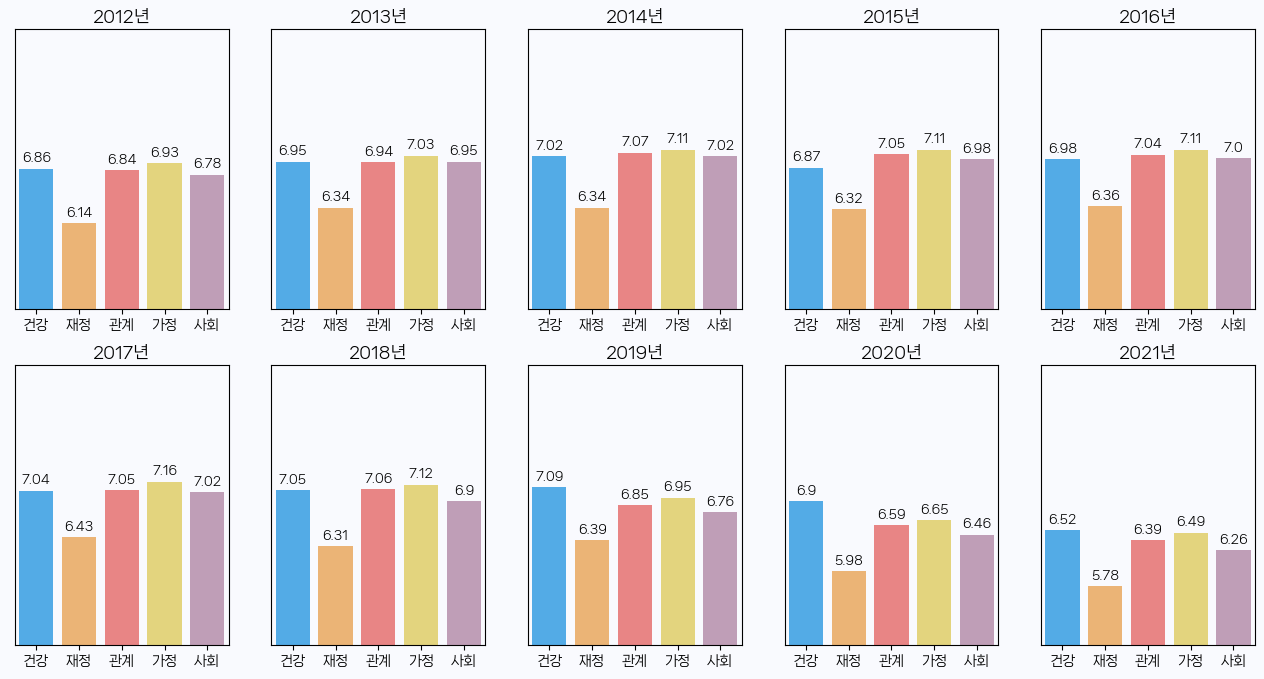

In [16]:
plt.figure(figsize=(16,8))
#그래프 내부 배경 색

mpl.rc('axes', facecolor = '#F9FAFE', edgecolor = 'k')

#그래프 외부 배경 색

mpl.rc('figure', facecolor = '#F9FAFE', edgecolor ='#F9FAFE')
for i,y in enumerate(year):
    pie = pd.DataFrame(dt.loc[4,f'{y}':f'{y}사회'])
    pie.rename(columns={4:'idx'},inplace=True)
    pie.drop(index=y,inplace=True)
    # print(pie.iloc[:,:])
    
    i += 1
    plt.subplot(2,5,i)
    g = sns.barplot(data=pie,x=labels,y='idx',palette=colors)
    ax = g
    ax.get_yaxis().set_visible(False)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height+0.1, height, ha = 'center', size = 9)

    plt.title(f'{y}년')
    plt.ylim(5,8.7)
    plt.ylabel('')
    plt.xticks(index, labels)

# plt.savefig('seoul_pie.png')
plt.savefig('./png/50.png')

plt.show()

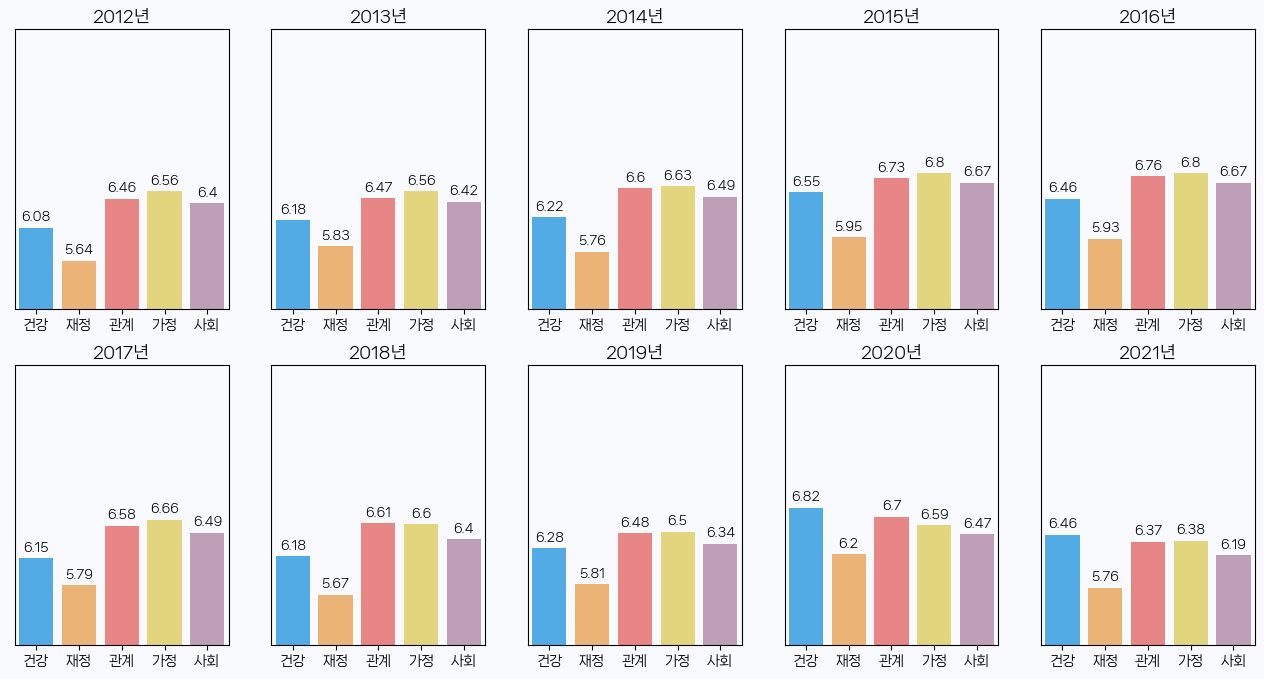

In [17]:
plt.figure(figsize=(16,8))
#그래프 내부 배경 색

mpl.rc('axes', facecolor = '#F9FAFE', edgecolor = 'k')

#그래프 외부 배경 색

mpl.rc('figure', facecolor = '#F9FAFE', edgecolor ='#F9FAFE')
for i,y in enumerate(year):
    pie = pd.DataFrame(dt.loc[5,f'{y}':f'{y}사회'])
    pie.rename(columns={5:'idx'},inplace=True)
    pie.drop(index=y,inplace=True)
    # print(pie.iloc[:,:])
    
    i += 1
    plt.subplot(2,5,i)
    g = sns.barplot(data=pie,x=labels,y='idx',palette=colors)
    ax = g
    ax.get_yaxis().set_visible(False)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height+0.1, height, ha = 'center', size = 9)

    plt.title(f'{y}년')
    plt.ylim(5,8.7)
    plt.ylabel('')
    plt.xticks(index, labels)

# plt.savefig('seoul_pie.png')
plt.savefig('./png/60over.png')

plt.show()